In [338]:
using HDF5
using Plots
using GR

function read_snap(filename :: String)
    
    pos  = h5read(filename,"PartType0/Coordinates")
    Bfl  = h5read(filename,"PartType0/Bfield") 
    Vel  = h5read(filename,"PartType0/Velocities")
    alp  = h5read(filename,"PartType0/EPalpha")
    bet  = h5read(filename,"PartType0/EPbeta")
    divB = h5read(filename,"PartType0/divB")
    #Ids  = h5read(filename,"PartType0/ParticleIDs")
    h    = h5read(filename,"PartType0/SmoothingLengths")
    rho  = h5read(filename,"PartType0/Densities")
    head = h5readattr(filename,"Header")

    print("Leyendo ",filename," at time: ",head["Time"],"\n")
    x = pos[1,:]
    y = pos[2,:]
    z = pos[3,:]
    bx = Bfl[1,:]
    by = Bfl[2,:]
    bz = Bfl[3,:]
    Vx = Vel[1,:]
    Vy = Vel[2,:]
    Vz = Vel[3,:]
    
    v2 = Vx.*Vx.+Vy.*Vy.+Vz.*Vz
    b2 = by.*by.+by.*by.+bz.*bz
    
    Npart=size(b2,1)
        
    print("Min x:",minimum(x)," / Max x:",maximum(x),"\n")
    print("Min y:",minimum(y)," / Max y:",maximum(y),"\n")
    print("Min z:",minimum(z)," / Max z:",maximum(z),"\n")
    print("Min h:",minimum(h)," / Max h:",maximum(h),"\n")
    (Dict(:H => head, :x=>pos, :bfl=> Bfl, :b2=>b2, :v=>Vel, :v2=>v2, 
            :divB=>divB, :rho=>rho, :hsml=>h,:bet=> bet,Npart=> Npart))
end

function do_heat(data,what,Nmax)
    #Nmax=128
    #x=x.-minimum(x)
    #y=y.-minimum(y)
    #b2=data[what]
    b2=what
    Npart=size(b2,1)
    Lbox=1.0#+maximum(x)
    A = ones((Nmax, Nmax))*minimum(b2)
    grid = ones((Nmax, Nmax))
    #grid = [Set{Int}() for x=1:Nmax, y=1:Nmax];
    #insert(grid) = p -> push!(grid[trunc(Int, p.x/Lbox*Nmax), trunc(Int, p.y/Lbox*Nmax)], p.n);
    #foreach(insert(grid), data)
    x=data[:x][1,:]
    y=data[:x][2,:]
    for ind = 1:Npart
        i,j = trunc(Int, x[ind]/Lbox*Nmax+1), trunc(Int, y[ind]/Lbox*Nmax+1)
        A[i,j] += b2[ind]
        grid[i,j] += 1 
    end
    AA=log10.(A./grid)
    #AA=(A./grid)
    (AA)
end

do_heat (generic function with 1 method)

In [353]:
#filename="OrszagTangVortex_0002.hdf5"
base=read_snap("NO_FORCE/OrszagTangVortex_0006.hdf5")
run=read_snap("OrszagTangVortex_0006.hdf5")

Leyendo NO_FORCE/OrszagTangVortex_0006.hdf5 at time: [0.3]
Min x:2.5523163584480393e-6 / Max x:0.9999925516650334
Min y:7.04013081335452e-8 / Max y:0.9999996182521615
Min z:9.223417551055611e-7 / Max z:0.9999995524441962
Min h:0.014674212 / Max h:0.029498821
Leyendo OrszagTangVortex_0006.hdf5 at time: [0.3]
Min x:4.258106809986908e-6 / Max x:0.9999972557099169
Min y:2.7865549123706757e-6 / Max y:0.9999935287810339
Min z:6.354485190001022e-6 / Max z:0.9999991413491913
Min h:0.009040602 / Max h:0.031219218


Dict{Any, Any} with 11 entries:
  :bfl   => Float32[-0.0331468 -0.0887744 … 0.0430738 0.06595; 0.0192505 0.0465…
  :rho   => Float32[0.0533012, 0.0547111, 0.0552099, 0.0578773, 0.0528964, 0.05…
  :b2    => Float32[0.000741163, 0.00433277, 0.00832601, 0.015324, 0.000577704,…
  :v2    => Float32[0.00344557, 0.0222011, 0.0438061, 0.0571151, 0.00196261, 0.…
  :hsml  => Float32[0.0309985, 0.0307287, 0.0306366, 0.0301603, 0.0310769, 0.03…
  :x     => [0.0061997 0.0505213 … 0.971178 0.992153; 0.0213277 0.0391092 … 0.9…
  :v     => Float32[-0.0212353 0.0341721 … -0.0127024 0.0387678; 0.0544065 0.14…
  :divB  => Float32[0.0, -2.7465f-5, 0.771409, 0.0, -0.640289, 0.0443644, 0.018…
  :H     => Dict{String, Any}("NumPart_Total_HighWord"=>UInt32[0x00000000, 0x00…
  262144 => 262144
  :bet   => Float32[0.00946531, 0.0745458, 0.0363496, 0.00689103, 0.0720972, 0.…

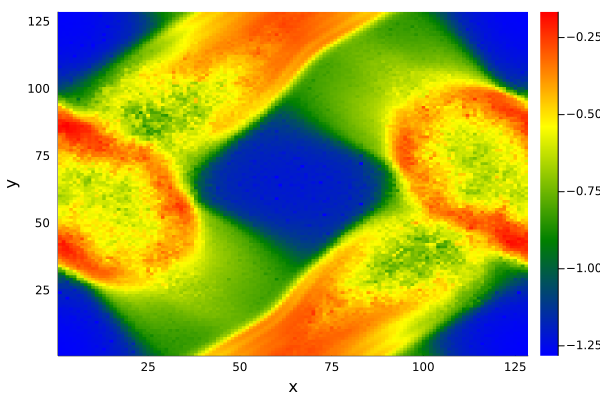

In [354]:
gr()
Nmax =128
#AA   =do_heat(run,run[:bfl][3,:],Nmax)
EdivB=run[:hsml].*run[:divB]
EdivB=run[:b2]
#EdivB=EdivB/sqrt.(run[:b2].+1E-5)
#AA   =do_heat(run,run[:bfl][1,:],Nmax)
AA   =do_heat(run,run[:rho],Nmax)
heatmap(1:Nmax,1:Nmax,AA,c=cgrad([:blue,:green,:yellow,:red]),xlabel="x", ylabel="y")

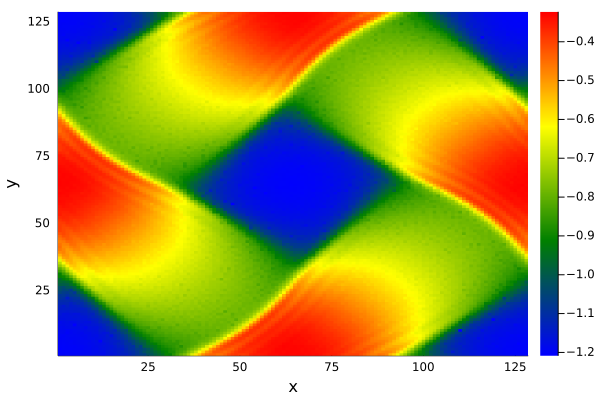

In [355]:
gr()
Nmax=128
EdivB=base[:hsml].*base[:divB]
EdibB=base[:b2]
#ABase=do_heat(base,base[:bfl][1,:],Nmax)
ABase=do_heat(base,base[:rho],Nmax)
heatmap(1:Nmax,1:Nmax,ABase,c=cgrad([:blue,:green,:yellow,:red]),xlabel="x", ylabel="y")

In [320]:
#shade(run[:b2],run[:rho])